In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow import keras
from keras import models
from keras import layers
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv')
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [2]:
### Data conversion for network perception

# Useless features

del df['PassengerId']
del df['Name']

df.isnull().sum()

HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

In [3]:
# Replacing Objects columns with integer  encoding

label_encoder = preprocessing.LabelEncoder()

df['HomePlanet'] = label_encoder.fit_transform(df["HomePlanet"])
df['CryoSleep'] = label_encoder.fit_transform(df["CryoSleep"])
df['Cabin'] = label_encoder.fit_transform(df["Cabin"])
df['Destination'] = label_encoder.fit_transform(df["Destination"])
df['RoomService'] = label_encoder.fit_transform(df["RoomService"])
df['VIP'] = label_encoder.fit_transform(df["VIP"])

# Useless features

df.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,1,0,149,2,39.0,0,0,0.0,0.0,0.0,0.0,False
1,0,0,2184,2,24.0,0,109,9.0,25.0,549.0,44.0,True
2,1,0,1,2,58.0,1,43,3576.0,0.0,6715.0,49.0,False
3,1,0,1,2,33.0,0,0,1283.0,371.0,3329.0,193.0,False
4,0,0,2186,2,16.0,0,277,70.0,151.0,565.0,2.0,True
5,0,0,2183,1,44.0,0,0,483.0,0.0,291.0,0.0,True
6,0,0,3425,2,26.0,0,42,1539.0,3.0,0.0,0.0,True
7,0,1,4559,2,28.0,0,0,0.0,0.0,0.0,NaN,True
8,0,0,3565,2,35.0,0,0,785.0,17.0,216.0,0.0,True
9,1,1,150,0,14.0,0,0,0.0,0.0,0.0,0.0,True


In [4]:
# Extract Transported feature as target array

y = df['Transported']
del df['Transported']

# Filling NaN in float and int by means

a = df.columns[df.isnull().any()]
for i in a:
    df[i] = df[i].fillna(df[i].mode()[0])  
    
# Convert all to [0 - 1] 

for i in df.columns:
    a = max(df[i])
    b = min(df[i])
    df[i] = (df[i] - b) / a
    
df.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.333333,0.0,0.022713,0.666667,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.332927,0.666667,0.303797,0.0,0.085625,0.000302,0.001064,0.024500,0.001823
2,0.333333,0.0,0.000152,0.666667,0.734177,0.5,0.033778,0.119948,0.000000,0.299670,0.002030
3,0.333333,0.0,0.000152,0.666667,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997
4,0.000000,0.0,0.333232,0.666667,0.202532,0.0,0.217596,0.002348,0.006428,0.025214,0.000083
5,0.000000,0.0,0.332774,0.333333,0.556962,0.0,0.000000,0.016201,0.000000,0.012986,0.000000
6,0.000000,0.0,0.522104,0.666667,0.329114,0.0,0.032993,0.051622,0.000128,0.000000,0.000000
7,0.000000,0.5,0.694970,0.666667,0.354430,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.0,0.543445,0.666667,0.443038,0.0,0.000000,0.026331,0.000724,0.009639,0.000000
9,0.333333,0.5,0.022866,0.000000,0.177215,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:
# Train/test splitting

x_train, x_test, y_train, y_test = train_test_split(df, y, test_size = 0.2, random_state = 13)

# Build network model

model = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dropout(.5),
    layers.Dense(128, activation="relu"),
    layers.Dropout(.1),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="Adam",
             loss="binary_crossentropy",
             metrics=["accuracy"])


In [6]:
# Fit it!

history = model.fit(x_train,
                    y_train,
                    epochs = 35,
                    batch_size = 4,
                    validation_data = (x_test, y_test))

history_dict = history.history
history_dict.keys()

Epoch 1/35
1739/1739 [==============================] - 6s 3ms/step - loss: 0.5359 - accuracy: 0.7331 - val_loss: 0.4831 - val_accuracy: 0.7769
Epoch 2/35
1739/1739 [==============================] - 4s 3ms/step - loss: 0.4909 - accuracy: 0.7645 - val_loss: 0.4537 - val_accuracy: 0.7769
Epoch 3/35
1739/1739 [==============================] - 4s 3ms/step - loss: 0.4728 - accuracy: 0.7721 - val_loss: 0.4852 - val_accuracy: 0.7734
Epoch 4/35
1739/1739 [==============================] - 4s 2ms/step - loss: 0.4679 - accuracy: 0.7725 - val_loss: 0.4448 - val_accuracy: 0.7993
Epoch 5/35
1739/1739 [==============================] - 4s 2ms/step - loss: 0.4620 - accuracy: 0.7767 - val_loss: 0.4376 - val_accuracy: 0.7964
Epoch 6/35
1739/1739 [==============================] - 4s 3ms/step - loss: 0.4567 - accuracy: 0.7798 - val_loss: 0.4402 - val_accuracy: 0.7941
Epoch 7/35
1739/1739 [==============================] - 4s 3ms/step - loss: 0.4511 - accuracy: 0.7872 - val_loss: 0.4434 - val_accuracy:

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

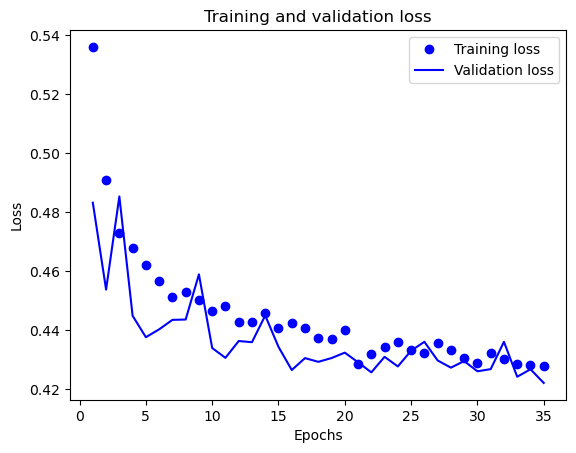

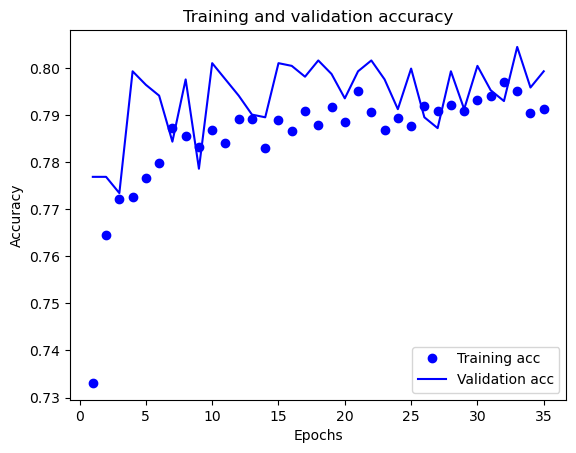

In [7]:
# Visualization of training process, epoch/loss

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label = "Training loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Visualization of training process, epoch/accuracy

plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label = "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [8]:
# Prediction and accuracy

pred = model.predict(x_test)
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"test_acc: {test_acc}")

55/55 [==============================] - 0s 2ms/step - loss: 0.4221 - accuracy: 0.7993
test_acc: 0.7993099689483643


In [9]:
# Optimal metric of success

from sklearn.metrics import recall_score

p = np.around(pred)
recall_score(y_test, p)

0.8323632130384168

In [10]:
# Making submission, prepare test data

test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')

del test['PassengerId']
del test['Name']

label_encoder = preprocessing.LabelEncoder()

test['HomePlanet'] = label_encoder.fit_transform(test["HomePlanet"])
test['CryoSleep'] = label_encoder.fit_transform(test["CryoSleep"])
test['Cabin'] = label_encoder.fit_transform(test["Cabin"])
test['Destination'] = label_encoder.fit_transform(test["Destination"])
test['RoomService'] = label_encoder.fit_transform(test["RoomService"])
test['VIP'] = label_encoder.fit_transform(test["VIP"])

a = test.columns[test.isnull().any()]
for i in a:
    test[i] = test[i].fillna(test[i].mode()[0])  

for i in df.columns:
    a = max(test[i])
    b = min(test[i])
    test[i] = (test[i] - b) / a
    
test.head(10)

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0.000000,0.5,0.852680,0.666667,0.341772,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.571822,0.666667,0.240506,0.0,0.000000,0.000356,0.000000,0.142260,0.000000
2,0.333333,0.5,0.078714,0.000000,0.392405,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.333333,0.0,0.079326,0.666667,0.481013,0.0,0.000000,0.263206,0.000000,0.009121,0.026266
4,0.000000,0.0,0.594181,0.666667,0.253165,0.0,0.011876,0.000000,0.076580,0.000000,0.000000
5,0.000000,0.0,0.642573,0.666667,0.392405,0.0,0.000000,0.063902,0.031717,0.005694,0.002694
6,0.333333,0.5,0.036753,0.000000,0.265823,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.333333,0.5,0.141807,0.666667,0.253165,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.333333,0.5,0.141807,0.000000,0.291139,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.0,0.642879,0.000000,0.303797,0.0,0.000000,0.025284,0.000000,0.000000,0.000000


In [11]:
# Prediction and transform to True/False

sub = np.round(model.predict(test))
sub = pd.DataFrame(sub)
sub['Transported'] = sub

del sub [0]

sub.loc[sub['Transported'] == 1.0, 'Transported'] = 'True'
sub.loc[sub['Transported'] == 0.0, 'Transported'] = 'False'

sub.head(20)

134/134 [==============================] - 0s 1ms/step


,Transported
0,True
1,False
2,True
3,True
4,True
5,True
6,True
7,True
8,True
9,False


In [12]:
# Compile submission file

submission = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv')
submission = submission['PassengerId']
submission = pd.DataFrame(submission)
submission['Transported'] = sub

submission.to_csv('/kaggle/working/submission.csv', index = False)
submission.head(20)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
5,0027_01,True
6,0029_01,True
7,0032_01,True
8,0032_02,True
9,0033_01,False
